### Imports

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle
import re
import numpy as np
import pandas as pd
import string
import os
import nltk
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tadiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#spinoza_improve_understanding  = open("spinoza.txt")

In [52]:
f=open('spinoza.txt')
str=[]
str=f.read()
"""str
str.split('Farewell.*')[1][20:].split('End of ')[0]
str=re.sub('r[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', str)
str=re.sub(r'[0123456789]', ' ', str)"""

"str\nstr.split('Farewell.*')[1][20:].split('End of ')[0]\nstr=re.sub('r[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-ÿ\xad\x0c6§\\[\\]\\\\£\\Â\n\r]', '', str)\nstr=re.sub(r'[0123456789]', ' ', str)"

In [53]:
str

'ï»¿The Project Gutenberg EBook of On the Improvement of the Understanding, by\nBaruch Spinoza  [Benedict de Spinoza]\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: On the Improvement of the Understanding\n       (Treatise on the Emendation of the Intellect)\n\nAuthor: Baruch Spinoza  [Benedict de Spinoza]\n\nTranslator: R. H. M. Elwes\n\nPosting Date: April 7, 2014 [EBook #1016]\nRelease Date: August, 1997\nFirst Posted: August 13, 1997\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ON IMPROVEMENT OF UNDERSTANDING ***\n\n\n\n\nProduced by an anonymous Project Gutenberg volunteer. HTML\nversion by Al Haines.\n\n\n\n\n\n\n\n\n\n\nOn the Improvement of the Understanding\n\n(Treatise on the Emendation of the Intellect)\n\n\nby\n\nBaruch Spinoza\n\n[Ben

In [54]:
"""import stanfordnlp

nlp = stanfordnlp.Pipeline(processors='tokenize', lang='en')
doc = nlp(str)
for i, sentence in enumerate(doc.sentences):
    print(f"====== Sentence {i+1} tokens =======")
    print(*[f"index: {token.index.rjust(3)}\ttoken: {token.text}" for token in sentence.tokens], sep='\n')"""

'import stanfordnlp\n\nnlp = stanfordnlp.Pipeline(processors=\'tokenize\', lang=\'en\')\ndoc = nlp(str)\nfor i, sentence in enumerate(doc.sentences):\n    print(f"====== Sentence {i+1} tokens =======")\n    print(*[f"index: {token.index.rjust(3)}\ttoken: {token.text}" for token in sentence.tokens], sep=\'\n\')'

In [55]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might', "'s", 'b', 'ofthe', 'p.', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil', 'one', 'press', 'cent', 'place'] + stopwords_list

In [56]:
def make_word_cloud(text, stopwords=stopwords.words('english')):
    cloud = wordcloud.WordCloud(width=2000, 
                            height=1100, 
                            background_color='#D1D1D1', 
                            max_words=30, 
                            stopwords=stopwords, 
                            color_func=lambda *args, **kwargs: (95,95,95)).generate(text)
    return cloud

In [57]:
cloud_dict = {}
cloud_dict[str] = make_word_cloud(str, custom_stopwords)
cloud_dict['middle1'] = make_word_cloud('this page intentionally left blank', stopwords=[])
cloud_dict['middle2'] = make_word_cloud('this page intentionally left blank', stopwords=[])

C:\Users\tadiw\AppData\Local\Temp\ipykernel_15880\2277350222.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(rect=[2, 2, 1, 3])


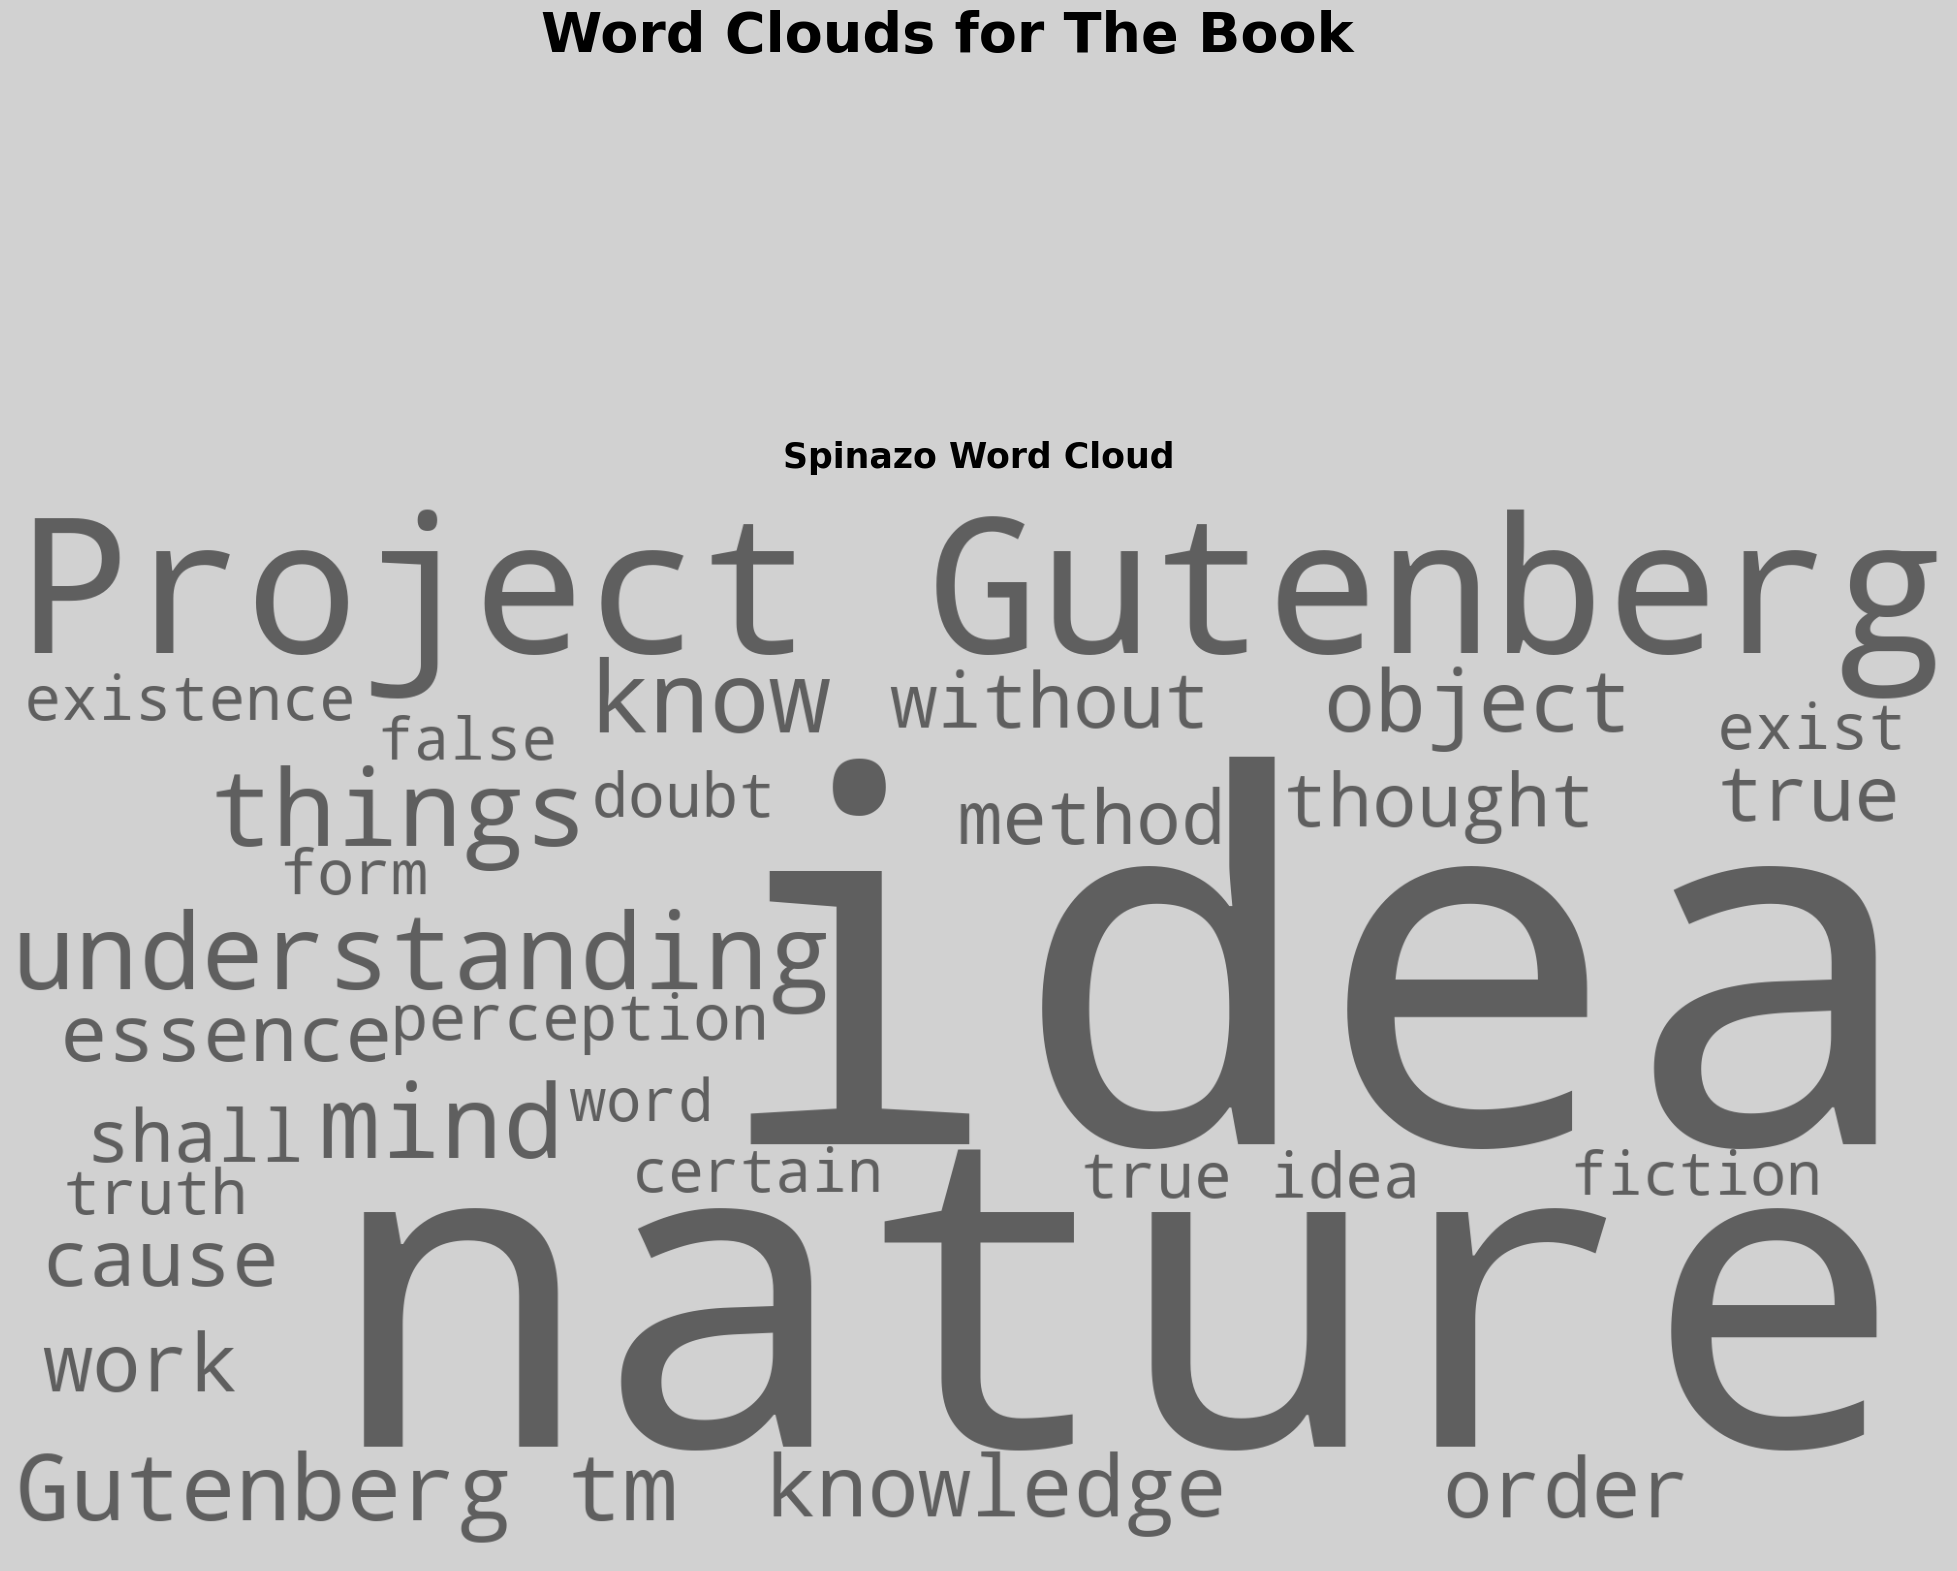

In [58]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(25, 21))
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for The Book', size=40, fontweight='bold')
ax1.imshow(cloud_dict[str])
ax1.set_title('Spinazo Word Cloud', size=25, pad=20, fontweight='bold')

for ax in fig.axes:
    ax.axis('off')
fig.patch.set_facecolor('#D1D1D1')
plt.show()

In [59]:
nltk.download('punkt')
all_text_words = word_tokenize(str)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tadiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
cleaned_words = [x.lower() for x in str if x.lower() not in custom_stopwords]
freq_dist = FreqDist(cleaned_words)

In [61]:
uninformative_words = ['else', 'shall', 'either', 'still', 'rather', 'another', 'made', 'without']
book_stopwords = custom_stopwords + [x[0] for x in freq_dist.most_common(50)] + uninformative_words

In [62]:
freq_dist_dict = {}
book_words = word_tokenize(str)
cleaned_words_book = [x.lower() for x in book_words if x.lower() not in book_stopwords]
school_freq_dict = FreqDist(cleaned_words_book)
freq_dist_dict = school_freq_dict.most_common(15)

In [63]:
# tokenizing the text to prepare it
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
all_tokens = nltk.regexp_tokenize(str, pattern)

all_tokens_stopped = [x.lower() for x in all_tokens if x.lower() not in custom_stopwords]

In [64]:
str

'ï»¿The Project Gutenberg EBook of On the Improvement of the Understanding, by\nBaruch Spinoza  [Benedict de Spinoza]\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: On the Improvement of the Understanding\n       (Treatise on the Emendation of the Intellect)\n\nAuthor: Baruch Spinoza  [Benedict de Spinoza]\n\nTranslator: R. H. M. Elwes\n\nPosting Date: April 7, 2014 [EBook #1016]\nRelease Date: August, 1997\nFirst Posted: August 13, 1997\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ON IMPROVEMENT OF UNDERSTANDING ***\n\n\n\n\nProduced by an anonymous Project Gutenberg volunteer. HTML\nversion by Al Haines.\n\n\n\n\n\n\n\n\n\n\nOn the Improvement of the Understanding\n\n(Treatise on the Emendation of the Intellect)\n\n\nby\n\nBaruch Spinoza\n\n[Ben

In [65]:
def baseline_clean(to_correct, capitals=True, bracketed_fn=False, odd_words_dict={}):
  # remove utf8 encoding characters and some punctuations
  result = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\\\£\Â*_<>""⎫•{}Γ~]', ' ', to_correct)
  result = re.sub(r'[\u2014\u2013\u2012-]', ' ', result)

  # replace whitespace characters with actual whitespace
  result = re.sub(r'\s', ' ', result)

  # replace odd quotation marks with a standard
  result = re.sub(r'[‘’“”]', "'", result)

  # replace the ﬀ, ﬃ and ﬁ with the appropriate counterparts
  result = re.sub(r'ﬀ', 'ff', result)
  result = re.sub(r'ﬁ', 'fi', result)
  result = re.sub(r'ﬃ', 'ffi', result)

  # remove or standardize some recurring common and meaninless words/phrases
  result = re.sub(r'\s*This\s*page\s*intentionally\s*left\s*blank\s*', ' ', result)
  result = re.sub(r'(?i)Aufgabe\s+', ' ', result)
  result = re.sub(r',*\s+cf\.', ' ', result)

  # some texts have footnotes conveniently in brackets - this removes them all, 
  # with a safety measure for unpaired brackets, and deletes all brackets afterwards
  if bracketed_fn:
    result = re.sub(r'\[.{0,300}\]|{.{0,300}}|{.{0,300}\]|\[.{0,300}}', ' ', result)
  result = re.sub(r'[\[\]{}]', ' ', result)

  # unify some abbreviations
  result = re.sub(r'&', 'and', result)
  result = re.sub(r'\se\.g\.\s', ' eg ', result)
  result = re.sub(r'\si\.e\.\s', ' ie ', result)
  result = re.sub('coroll\.', 'coroll', result)
  result = re.sub('pt\.', 'pt', result)

  # remove roman numerals, first capitalized ones
  result = re.sub(r'\s((I{2,}V*X*\.*)|(IV\.*)|(IX\.*)|(V\.*)|(V+I*\.*)|(X+L*V*I*]\.*))\s', ' ', result)
  # then lowercase
  result = re.sub(r'\s((i{2,}v*x*\.*)|(iv\.*)|(ix\.*)|(v\.*)|(v+i*\.*)|(x+l*v*i*\.*))\s', ' ', result)

  # remove periods and commas flanked by numbers
  result = re.sub(r'\d\.\d', ' ', result)
  result = re.sub(r'\d,\d', ' ', result)

  # remove the number-letter-number pattern used for many citations
  result = re.sub(r'\d*\w{,2}\d', ' ', result)

  # remove numerical characters
  result = re.sub(r'\d+', ' ', result)

  # remove words of 2+ characters that are entirely capitalized 
  # (these are almost always titles, headings, or speakers in a dialogue)
  # remove capital I's that follow capital words - these almost always roman numerals
  # some texts do use these capitalizations meaningfully, so we make this optional
  if capitals:
    result = re.sub(r'[A-Z]{2,}\s+I', ' ', result)
    result = re.sub(r'[A-Z]{2,}', ' ', result)

  # remove isolated colons and semicolons that result from removal of titles
  result = re.sub(r'\s+:\s*', ' ', result)
  result = re.sub(r'\s+;\s*', ' ', result)

  # remove isolated letters (do it several times because strings of isolated letters do not get captured properly)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)
  result = re.sub(r'\s[^aAI\.]\s', ' ', result)

  # remove isolated letters at the end of sentences or before commas
  result = re.sub(r'\s[^aI]\.', '.', result)
  result = re.sub(r'\s[^aI],', ',', result)

  # deal with spaces around periods and commas
  result = re.sub(r'\s+,\s+', ', ', result)
  result = re.sub(r'\s+\.\s+', '. ', result)

  # remove empty parantheses
  result = re.sub(r'(\(\s*\.*\s*\))|(\(\s*,*\s*)\)', ' ', result)

  # reduce multiple periods, commas, or whitespaces into a single one
  result = re.sub(r'\.+', '.', result)
  result = re.sub(r',+', ',', result)
  result = re.sub(r'\s+', ' ', result)

  # deal with isolated problem cases discovered in the data:
  for key in odd_words_dict.keys():
    result = re.sub(r''+key+'', odd_words_dict[key], result)

  return result

In [66]:
str=baseline_clean(str)

In [67]:
str

" The Project Gutenberg ook of On the Improvement of the Understanding, by Baruch Spinoza Benedict de Spinoza This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: On the Improvement of the Understanding (Treatise on the Emendation of the Intellect) Author: Baruch Spinoza Benedict de Spinoza Translator:. Elwes Posting Date: April ook Release Date: August, First Posted: August Language: English Produced by an anonymous Project Gutenberg volunteer. version by Al Haines. On the Improvement of the Understanding (Treatise on the Emendation of the Intellect) by Baruch Spinoza Benedict de Spinoza Translated by. Elwes On the Improvement of the Understanding Of the ordinary objects of men's desires Of the true and final good Certain rules of life Of the four modes of perception Of the best mode of

In [68]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([str])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([str])[0]
sequence_data[:10]

[1, 33, 27, 694, 2, 40, 1, 346, 2, 1]

In [69]:
sequence_data

[1,
 33,
 27,
 694,
 2,
 40,
 1,
 346,
 2,
 1,
 45,
 21,
 554,
 235,
 555,
 464,
 235,
 19,
 396,
 6,
 14,
 1,
 179,
 2,
 187,
 695,
 49,
 37,
 696,
 4,
 20,
 901,
 37,
 902,
 465,
 48,
 31,
 220,
 10,
 265,
 10,
 397,
 13,
 903,
 179,
 10,
 118,
 1,
 105,
 2,
 1,
 33,
 27,
 188,
 697,
 20,
 19,
 396,
 13,
 556,
 49,
 189,
 27,
 236,
 1267,
 40,
 1,
 346,
 2,
 1,
 45,
 466,
 40,
 1,
 698,
 2,
 1,
 190,
 904,
 554,
 235,
 555,
 464,
 235,
 1268,
 699,
 1269,
 557,
 1270,
 694,
 1271,
 557,
 905,
 65,
 467,
 905,
 700,
 1272,
 266,
 21,
 55,
 906,
 33,
 27,
 468,
 701,
 21,
 907,
 908,
 40,
 1,
 346,
 2,
 1,
 45,
 466,
 40,
 1,
 698,
 2,
 1,
 190,
 21,
 554,
 235,
 555,
 464,
 235,
 1273,
 21,
 699,
 40,
 1,
 346,
 2,
 1,
 45,
 2,
 1,
 558,
 119,
 2,
 1274,
 1275,
 2,
 1,
 43,
 4,
 1276,
 92,
 88,
 166,
 2,
 221,
 2,
 1,
 909,
 559,
 2,
 109,
 2,
 1,
 284,
 237,
 2,
 109,
 2,
 1,
 285,
 2,
 1,
 190,
 13,
 43,
 41,
 1277,
 3,
 1278,
 65,
 127,
 2,
 79,
 398,
 2,
 43,
 41,
 22,
 113,
 41,


In [70]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2281


In [71]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  18738


array([[  1,  33],
       [ 33,  27],
       [ 27, 694],
       [694,   2],
       [  2,  40],
       [ 40,   1],
       [  1, 346],
       [346,   2],
       [  2,   1],
       [  1,  45]])

In [72]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)


In [73]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  1  33  27 694   2]
The responses are:  [ 33  27 694   2  40]


In [74]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [75]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             22810     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 2281)              2283281   
                                                                 
Total params: 15,355,091
Trainable params: 15,355,091
Non-trainable params: 0
_________________________________________________________________


In [77]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [78]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

C:\Users\tadiw\anaconda3\envs\kudzidza_kwakadzama\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
293/293 [==============================] - ETA: 0s - loss: 6.2497
Epoch 1: loss improved from inf to 6.24969, saving model to nextword1.h5
293/293 [==============================] - 62s 186ms/step - loss: 6.2497 - lr: 0.0010
Epoch 2/150
293/293 [==============================] - ETA: 0s - loss: 5.8739
Epoch 2: loss improved from 6.24969 to 5.87391, saving model to nextword1.h5
293/293 [==============================] - 51s 174ms/step - loss: 5.8739 - lr: 0.0010
Epoch 3/150
293/293 [==============================] - ETA: 0s - loss: 5.6201
Epoch 3: loss improved from 5.87391 to 5.62008, saving model to nextword1.h5
293/293 [==============================] - 53s 180ms/step - loss: 5.6201 - lr: 0.0010
Epoch 4/150
293/293 [==============================] - ETA: 0s - loss: 5.4103
Epoch 4: loss improved from 5.62008 to 5.41032, saving model to nextword1.h5
293/293 [==============================] - 48s 163ms/step - loss: 5.4103 - lr: 0.0010
Epoch 5/150
293/293 [===================

In [ ]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.
    
    """
    for i in range(5):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        preds = model.predict_classes(sequence)
#         print(preds)
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [ ]:
"""
    We are testing our model and we will run the model
    until the user decides to stop the script.
    While the script is running we try and check if 
    the prediction can be made on the text. If no
    prediction can be made we just continue.

"""

# text1 = "at the dull"
# text2 = "collection of textile"
# text3 = "what a strenuous"
# text4 = "stop the script"

while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)
            
        except:
            continue